In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et

## Bring in the data needed

In [25]:
#Bring in surface temperature for each plot and join up
WheatTs = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyTs.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatTs = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyTs.pkl')],axis=1,keys=['Beat'],names=['Crop'])
LucerneTs = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyTs.pkl')
RyegrassTs = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyTs.pkl')
OatsTs = pd.concat([pd.read_pickle('.\Oats\DataFrames\DailyTs.pkl')],axis=1,keys=['Oats'],names=['Crop'])
Ts = pd.concat([WheatTs,BeatTs,LucerneTs,RyegrassTs,OatsTs],axis=1)
GH.SortFrame(Ts)
Ts.dropna(how='all',inplace=True)
Ts.drop_duplicates(inplace=True)


#Bring in air temperature data for each experiment
WheatTa = pd.read_pickle('.\Wheat\DataFrames\DailyTa.pkl')
BeatTa = pd.read_pickle('.\FodderBeat\DataFrames\DailyTa.pkl')
LandPTa = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyTa.pkl')
OatsTa = pd.read_pickle('.\Oats\DataFrames\DailyTa.pkl')
Ta = pd.concat([WheatTa,BeatTa,LandPTa,OatsTa])
Ta.dropna(how='all',inplace=True)
Ta.drop_duplicates(inplace=True)
GH.SortFrame(Ta)

#Bring in solar radiation data for each experiment
WheatRs = pd.read_pickle('.\Wheat\DataFrames\DailyRs.pkl')
BeatRs = pd.read_pickle('.\FodderBeat\DataFrames\DailyRs.pkl')
LandPRs = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyRs.pkl')
OatsRs = pd.read_pickle('.\Oats\DataFrames\DailyRs.pkl')
Rs = pd.concat([WheatRs,BeatRs,LandPRs,OatsRs])
Rs.dropna(how='all',inplace=True)
Rs.drop_duplicates(inplace=True)
GH.SortFrame(Rs)

#Bring in vapour pressure deficit for each experiment
WheatEd = pd.read_pickle('.\Wheat\DataFrames\DailyEd.pkl')
BeatEd = pd.read_pickle('.\FodderBeat\DataFrames\DailyEd.pkl')
LandPEd = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyEd.pkl')
OatsEd = pd.read_pickle('.\Oats\DataFrames\DailyEd.pkl')
Ed = pd.concat([WheatEd,BeatEd,LandPEd,OatsEd])
Ed.dropna(how='all',inplace=True)
Ed.drop_duplicates(inplace=True)
GH.SortFrame(Ed)

#Bring in vapour pressure for each experiment
WheatEo = pd.read_pickle('.\Wheat\DataFrames\DailyEo.pkl')
BeatEo = pd.read_pickle('.\FodderBeat\DataFrames\DailyEo.pkl')
LandPEo = pd.read_pickle('.\LucerneAndPasture\DataFrames\DailyEo.pkl')
OatsEo = pd.read_pickle('.\Oats\DataFrames\DailyEo.pkl')
Eo = pd.concat([WheatEo,BeatEo,LandPEo,OatsEo])
Eo.dropna(how='all',inplace=True)
Eo.drop_duplicates(inplace=True)
GH.SortFrame(Eo)

#Bring in net radiatin for each experiment
WheatRn = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyRn.pkl')],axis=1,keys=['Wheat'],names=['Crop'])
BeatRn = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyRn.pkl')],axis=1,keys=['Beat'],names=['Crop'])
LucRn = pd.concat([pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyRn.pkl')],axis=1,keys=['Lucerne'],names=['Crop'])
RyeRn = pd.concat([pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyRn.pkl')],axis=1,keys=['Ryegrass'],names=['Crop'])
OatsRn = pd.concat([pd.read_pickle('.\Oats\DataFrames\DailyRn.pkl')],axis=1,keys=['Oats'],names=['Crop'])
Rn = pd.concat([WheatRn,BeatRn,LucRn,RyeRn,OatsRn],axis=1)
Rn.dropna(how='all',inplace=True)
Rn.drop_duplicates(inplace=True)
GH.SortFrame(Rn)

#Bring in fPAR (estimated from NDVI and interpolated to daily values) for each plot
WheatfPAR = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatfPAR = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Beat'],names =['Crop'])
LucernefPAR = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyfPAREstInt.pkl')
RyegrassfPAR = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyfPAREstInt.pkl')
OatsfPAR = pd.concat([pd.read_pickle('.\Oats\DataFrames\DailyfPAREstInt.pkl')],axis=1,keys=['Oats'],names =['Crop'])
fPAR = pd.concat([WheatfPAR,BeatfPAR,LucernefPAR,RyegrassfPAR,OatsfPAR],axis=1)
fPAR.dropna(how='all',inplace=True)
fPAR.drop_duplicates(inplace=True)
GH.SortFrame(fPAR)

#Bring in soil water use data.
WheatWU = pd.concat([pd.read_pickle('.\Wheat\DataFrames\DailyWU.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
BeatWU = pd.concat([pd.read_pickle('.\FodderBeat\DataFrames\DailyWU.pkl')],axis=1,keys=['Beat'],names =['Crop'])
LucWU = pd.read_pickle('.\LucerneAndPasture\DataFrames\LucDailyWU.pkl')
RyeWU = pd.read_pickle('.\LucerneAndPasture\DataFrames\RyeDailyWU.pkl')
OatsWU = pd.concat([pd.read_pickle('.\Oats\DataFrames\DailyWU.pkl')],axis=1,keys=['Oats'],names=['Crop'])
WU = pd.concat([WheatWU,BeatWU,LucWU,RyeWU,OatsWU],axis=1)
WU.dropna(how='all',inplace=True)
WU.drop_duplicates(inplace=True)
GH.SortFrame(WU)

In [26]:
FirstUnion = list(set(Ts.index).intersection(Ta.index))
SecondUnion = list(set(FirstUnion).intersection(Rs.index))
ThirdUnion = list(set(SecondUnion).intersection(Ed.index))
ForthUnion = list(set(ThirdUnion).intersection(Eo.index))
FifthUnion = list(set(ForthUnion).intersection(Rn.index))
SixthUnion = list(set(FifthUnion).intersection(fPAR.index))
CommonDates = SixthUnion
CommonDates.sort()

In [27]:
WU = WU.loc[np.min(CommonDates):,:].dropna(how='all').copy()

In [28]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

BeatGPs = GH.SetGraphicsPatterns(Ts.Beat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LucerneGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

RyegrassGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

OatsGPs = GH.SetGraphicsPatterns(Ts.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '250', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   0     -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          50    -  purple  0.15   o  purple
Irrigated 0    --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          50   --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

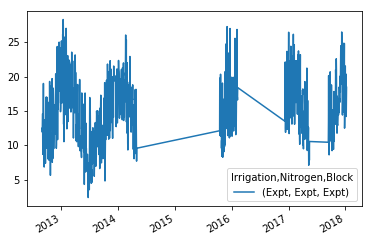

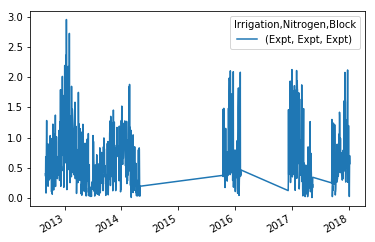

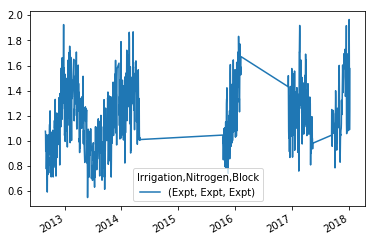

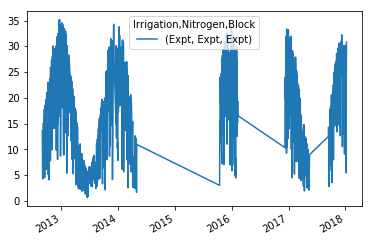

In [29]:
Ta.loc[CommonDates,:].plot()
Ed.loc[CommonDates,:].plot()
Eo.loc[CommonDates,:].plot()
Rs.loc[CommonDates,:].plot()

In [30]:
def MakeTimeSeriesGraphs(Data,name,ymin,ymax):
    Graph = plt.figure(figsize=(18,30))
    Crops = Data.columns.get_level_values(0).drop_duplicates().values
    pos = 1
    for C in Crops:
        GP = globals()[C+'GPs']
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,C].dropna(how='all'),ax,GP,2)
        plt.ylabel(name, fontsize=36);
        plt.ylim(ymin,ymax)
        plt.tick_params(labelsize=20)
        plt.title(C, fontsize=28)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=int(np.ceil(Data.loc[:,C].dropna(how='all').index.size/30/5))))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=1,numpoints=1,fontsize = 16,labelspacing = 0.05)
        pos+=1
def MakeSingleCropTimeSeries(Data,Crop):
    graph = plt.figure(figsize=(18,18))
    ax = graph.add_subplot(1,1,1)
    GP = globals()[Crop+'GPs']
    GH.AddIndexedPlot(Data.reindex(CommonDates).loc[:,Crop].dropna(how='all'),ax,GP,2)

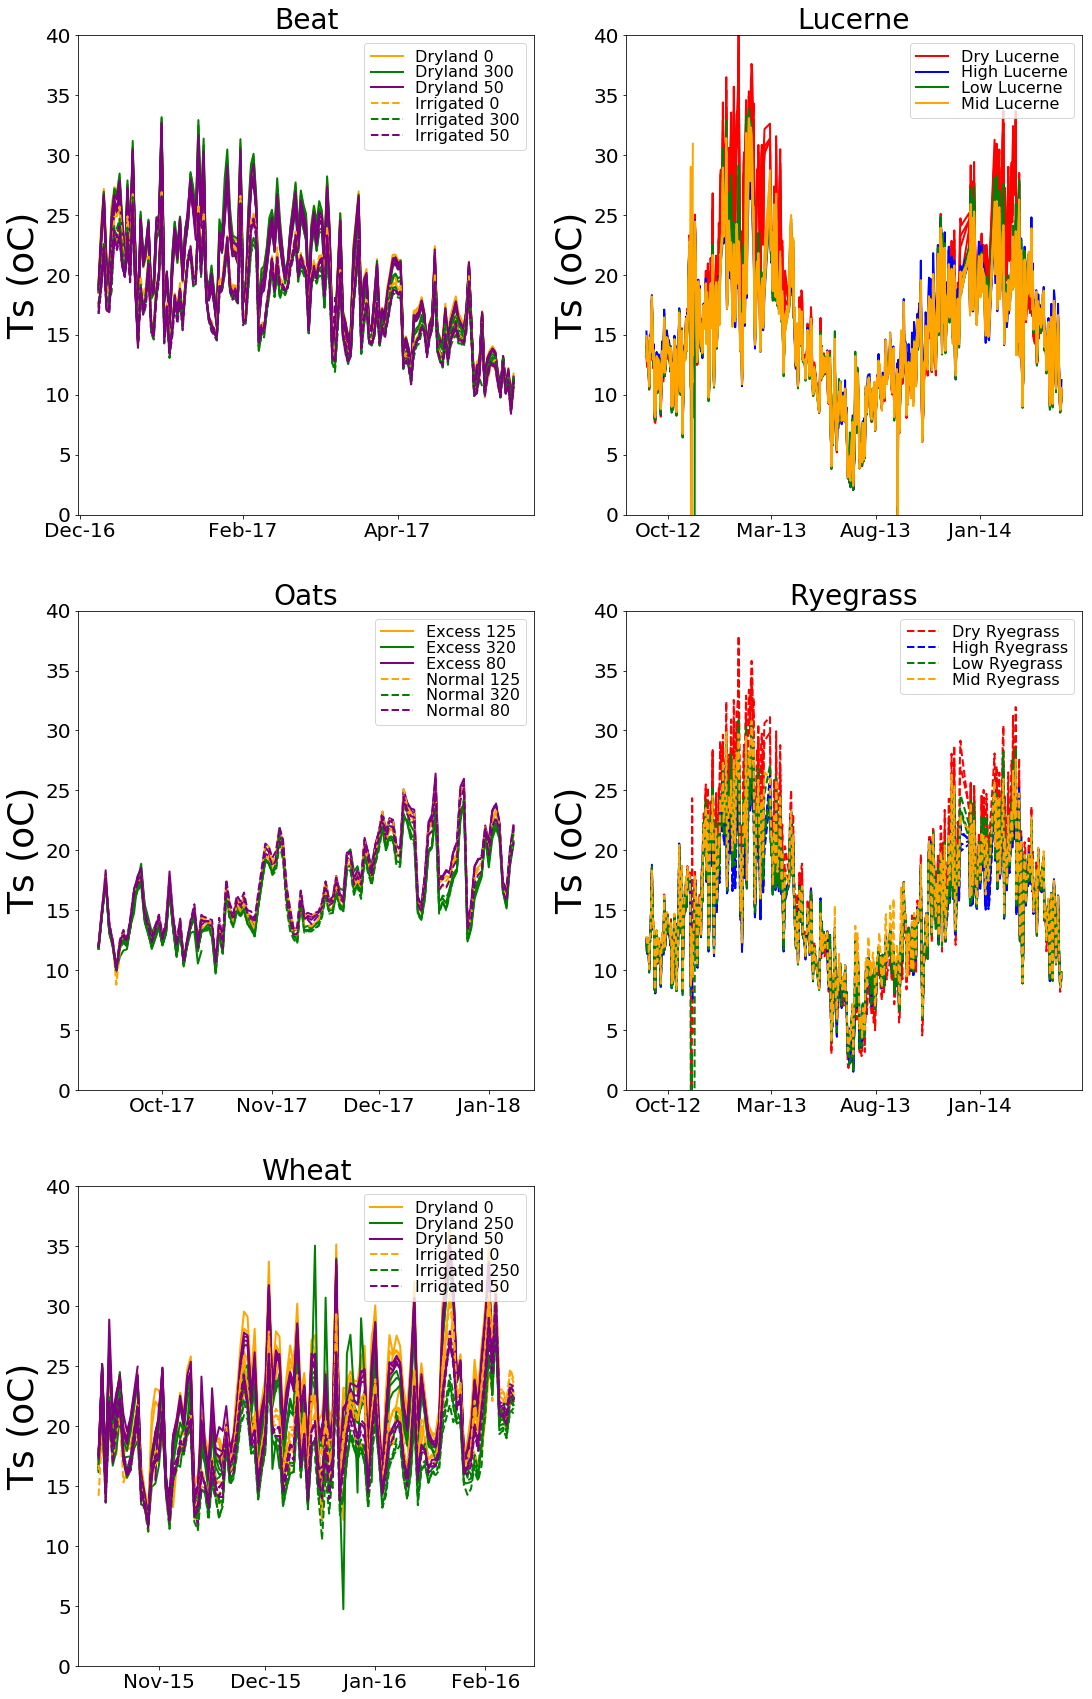

In [31]:
MakeTimeSeriesGraphs(Ts,'Ts (oC)',0,40)

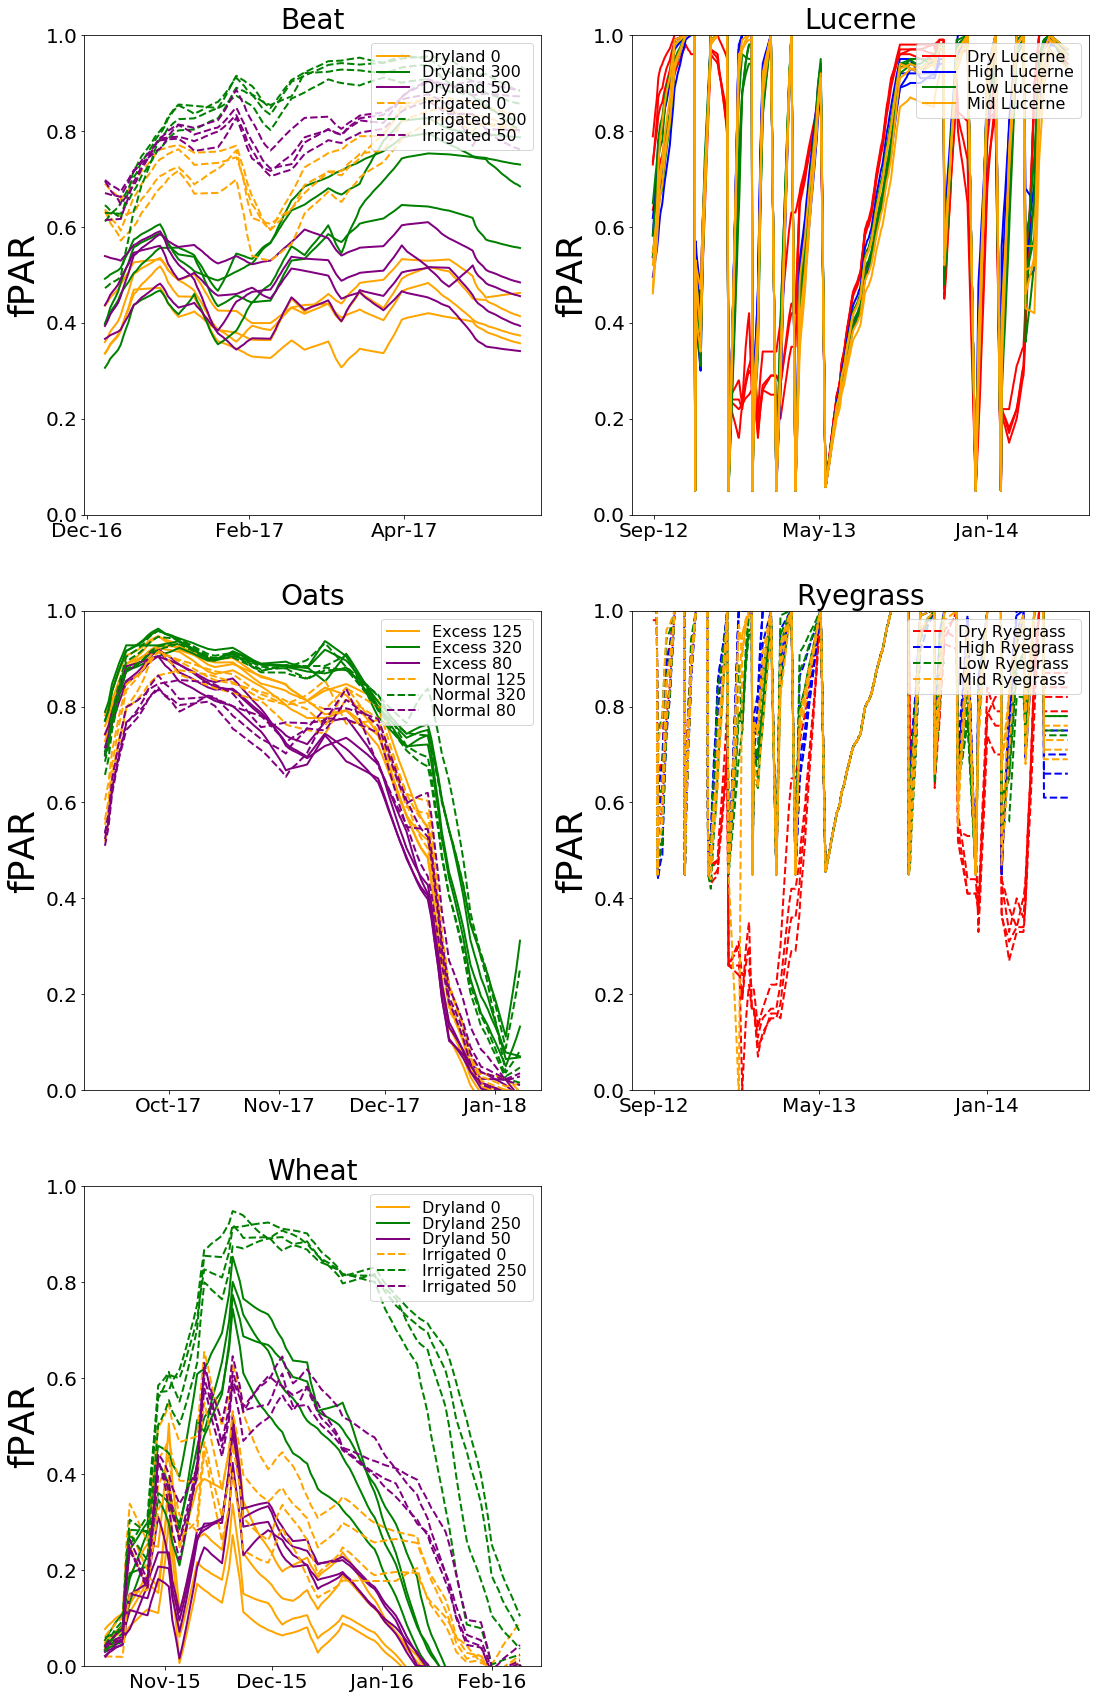

In [32]:
MakeTimeSeriesGraphs(fPAR,'fPAR',0,1)

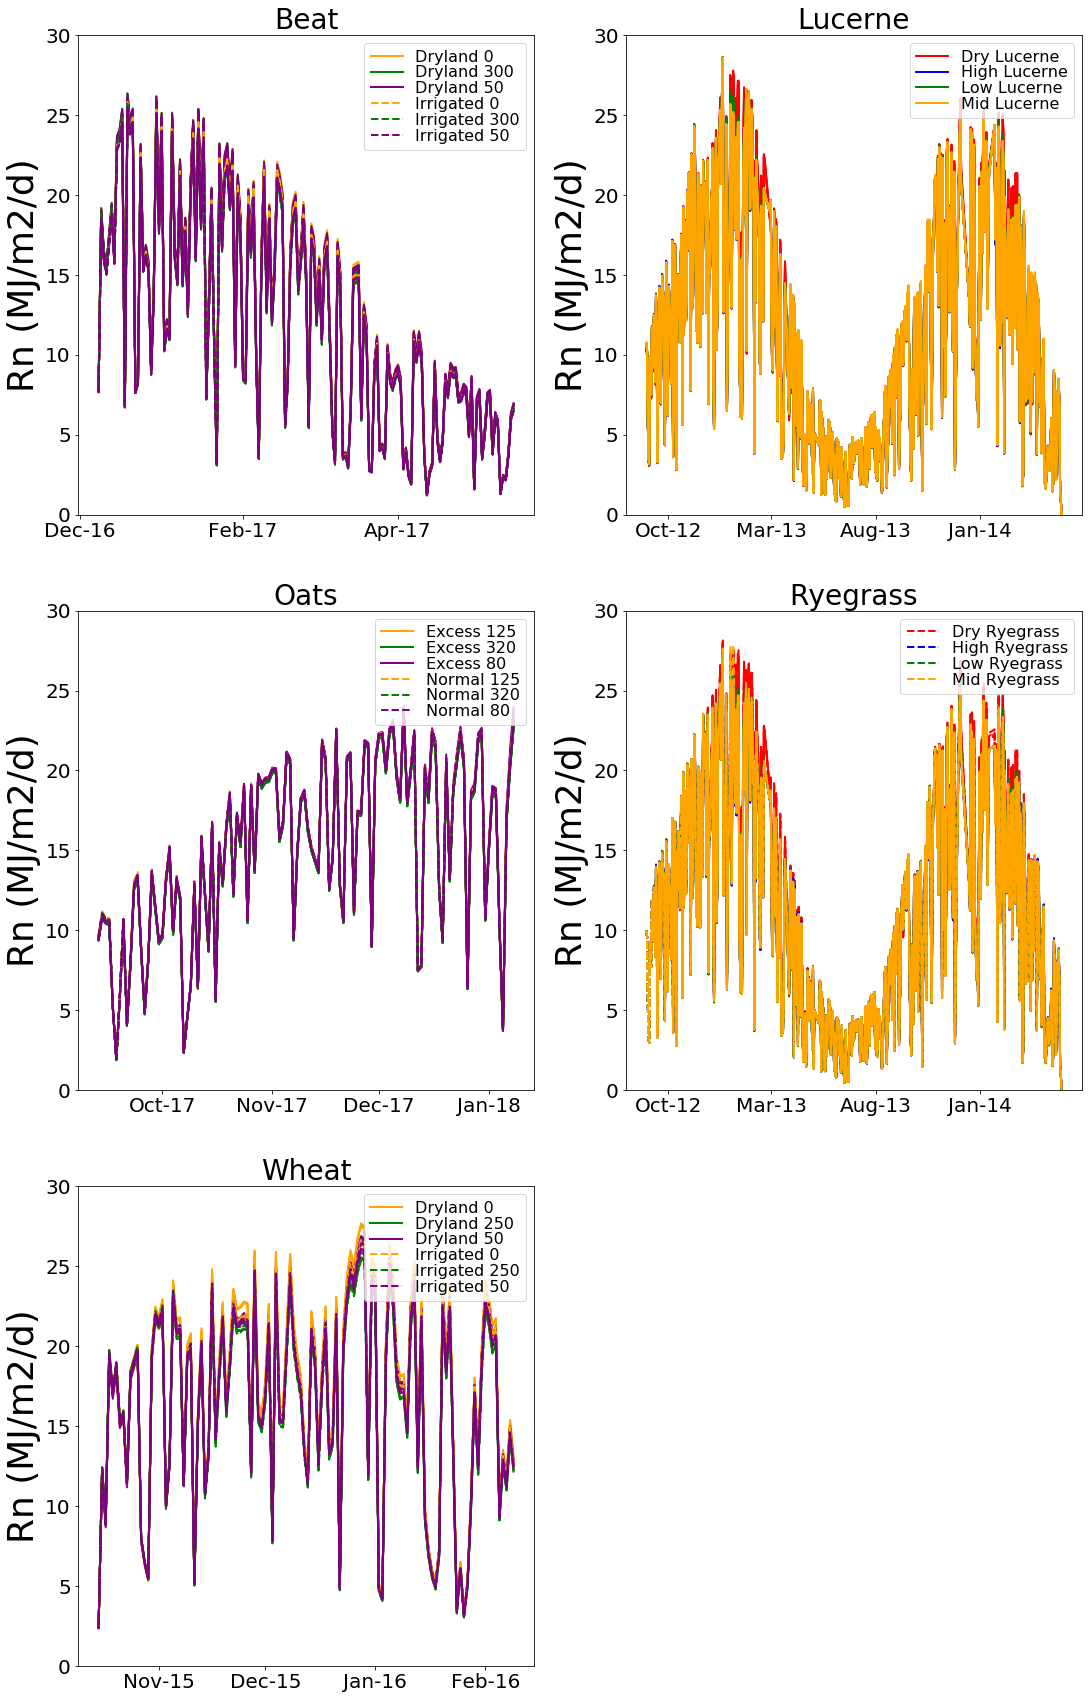

In [33]:
MakeTimeSeriesGraphs(Rn,'Rn (MJ/m2/d)',0,30)

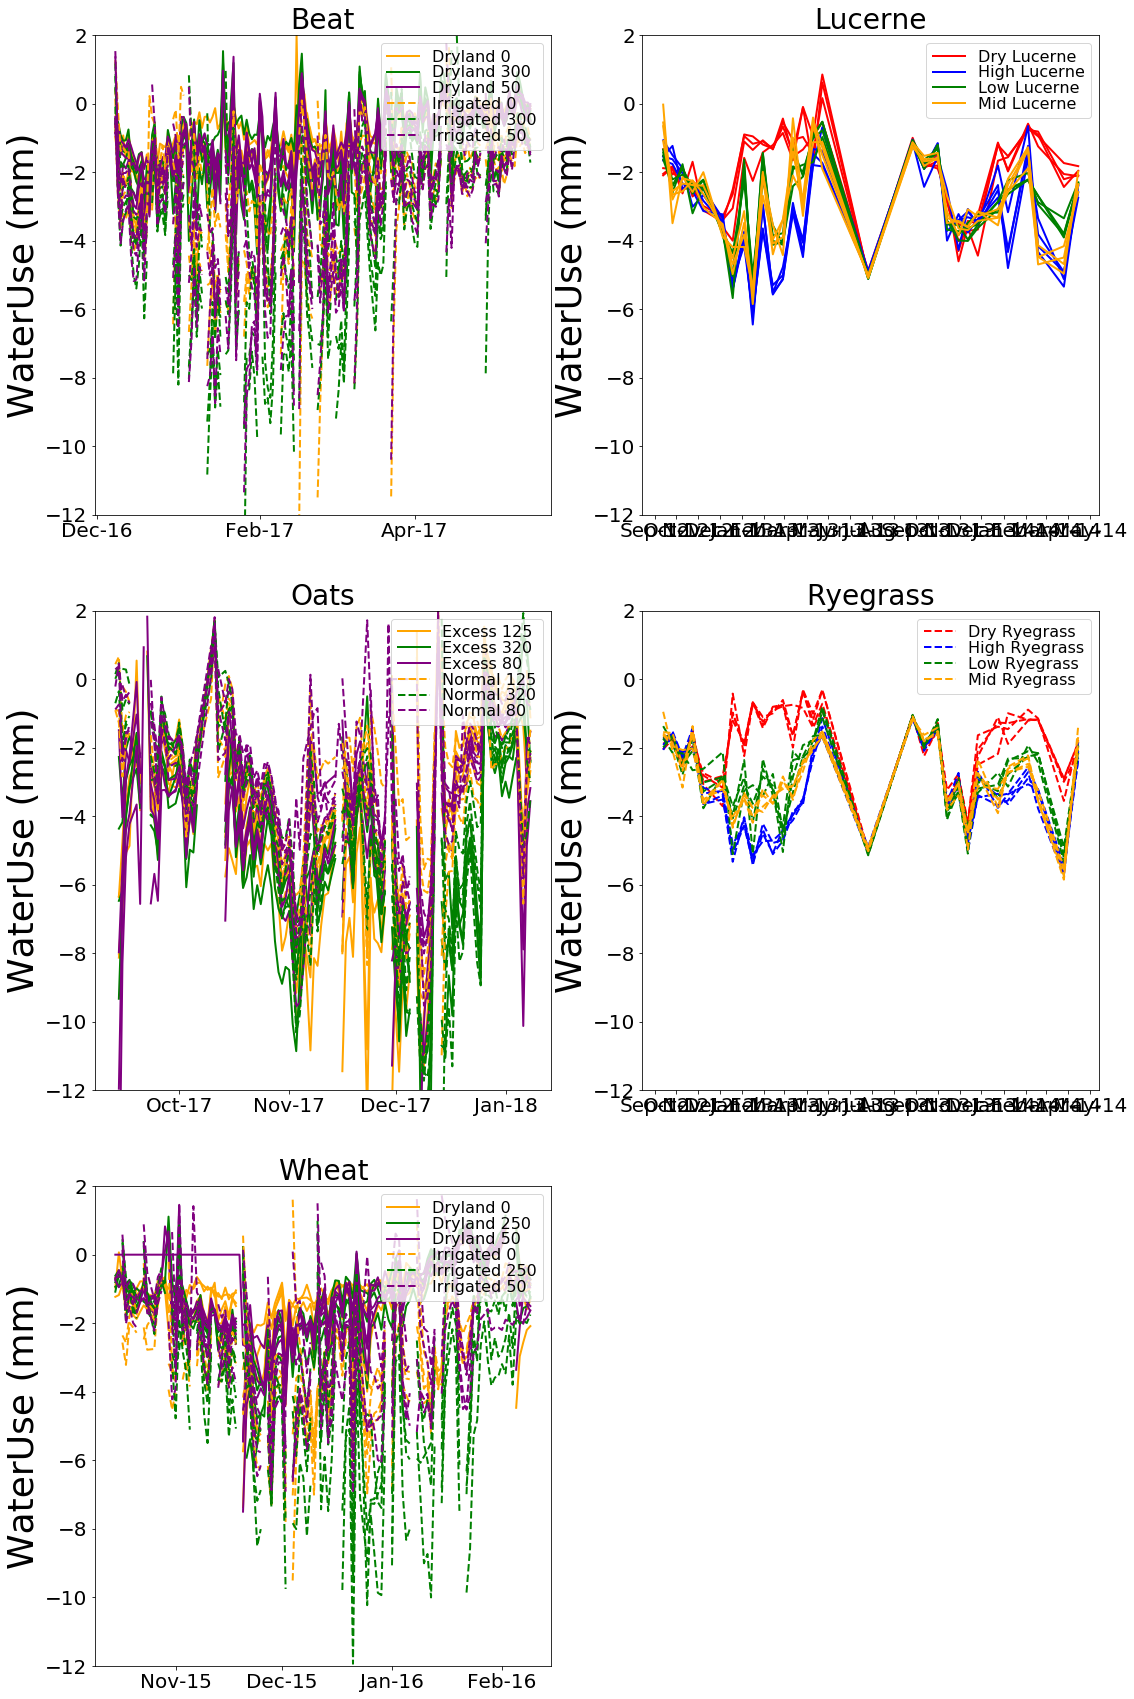

In [34]:
MakeTimeSeriesGraphs(WU,'WaterUse (mm)',-12,2)

In [35]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in To.columns:
    To.loc[:,plot] = Ts.loc[CommonDates,plot] + Ed.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate temperature difference
Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Td.columns:
    Td.loc[:,plot] = To.loc[CommonDates,plot] - Ta.loc[CommonDates,('Expt','Expt','Expt')].values
    
#Calculate alpha
def AlphaCoeff(Td,fPAR):
    CoverFact = 0.1+1.6*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    #return 1/(0.68 + 0.18*Td ) * CoverFact
    return np.exp(0.2663)  * np.exp(Td*-0.1270) * CoverFact

Alpha = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in Alpha.columns:
    Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                   fPAR.loc[x,plot]) for x in Alpha.index]

def estGDay(SoilRadn, AirTemp):
    Const = -0.7091
    SoilRadEff = np.multiply(SoilRadn.values,0.2149)
    AirTempEff = np.multiply(AirTemp.values,0.0736)
    return Const + SoilRadEff  + AirTempEff 

#Calculate G for each plot
G = pd.DataFrame(index=CommonDates, columns=Ts.columns)
for plot in G.columns:
    G.loc[:,plot] = estGDay(Rs.loc[CommonDates,('Expt','Expt','Expt')] * (1-fPAR.loc[CommonDates,plot]),
                            Ta.loc[CommonDates,('Expt','Expt','Expt')])
RnLessG = Rn - G

#Estimate Water Use by surfaces 
E = pd.DataFrame(index = CommonDates,columns=Ts.columns)
for plot in E.columns:
    E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                         Ta.loc[x,('Expt','Expt','Expt')],
                                         Alpha.loc[x,plot],
                                         'net') for x in E.index]

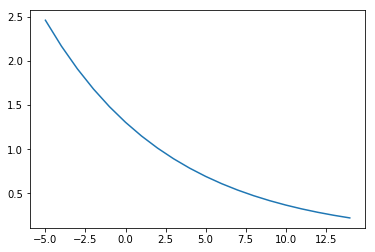

In [36]:
temprange = range(-5,15)
alphas = [AlphaCoeff(x,1.0) for x in temprange]
plt.plot(temprange,alphas)

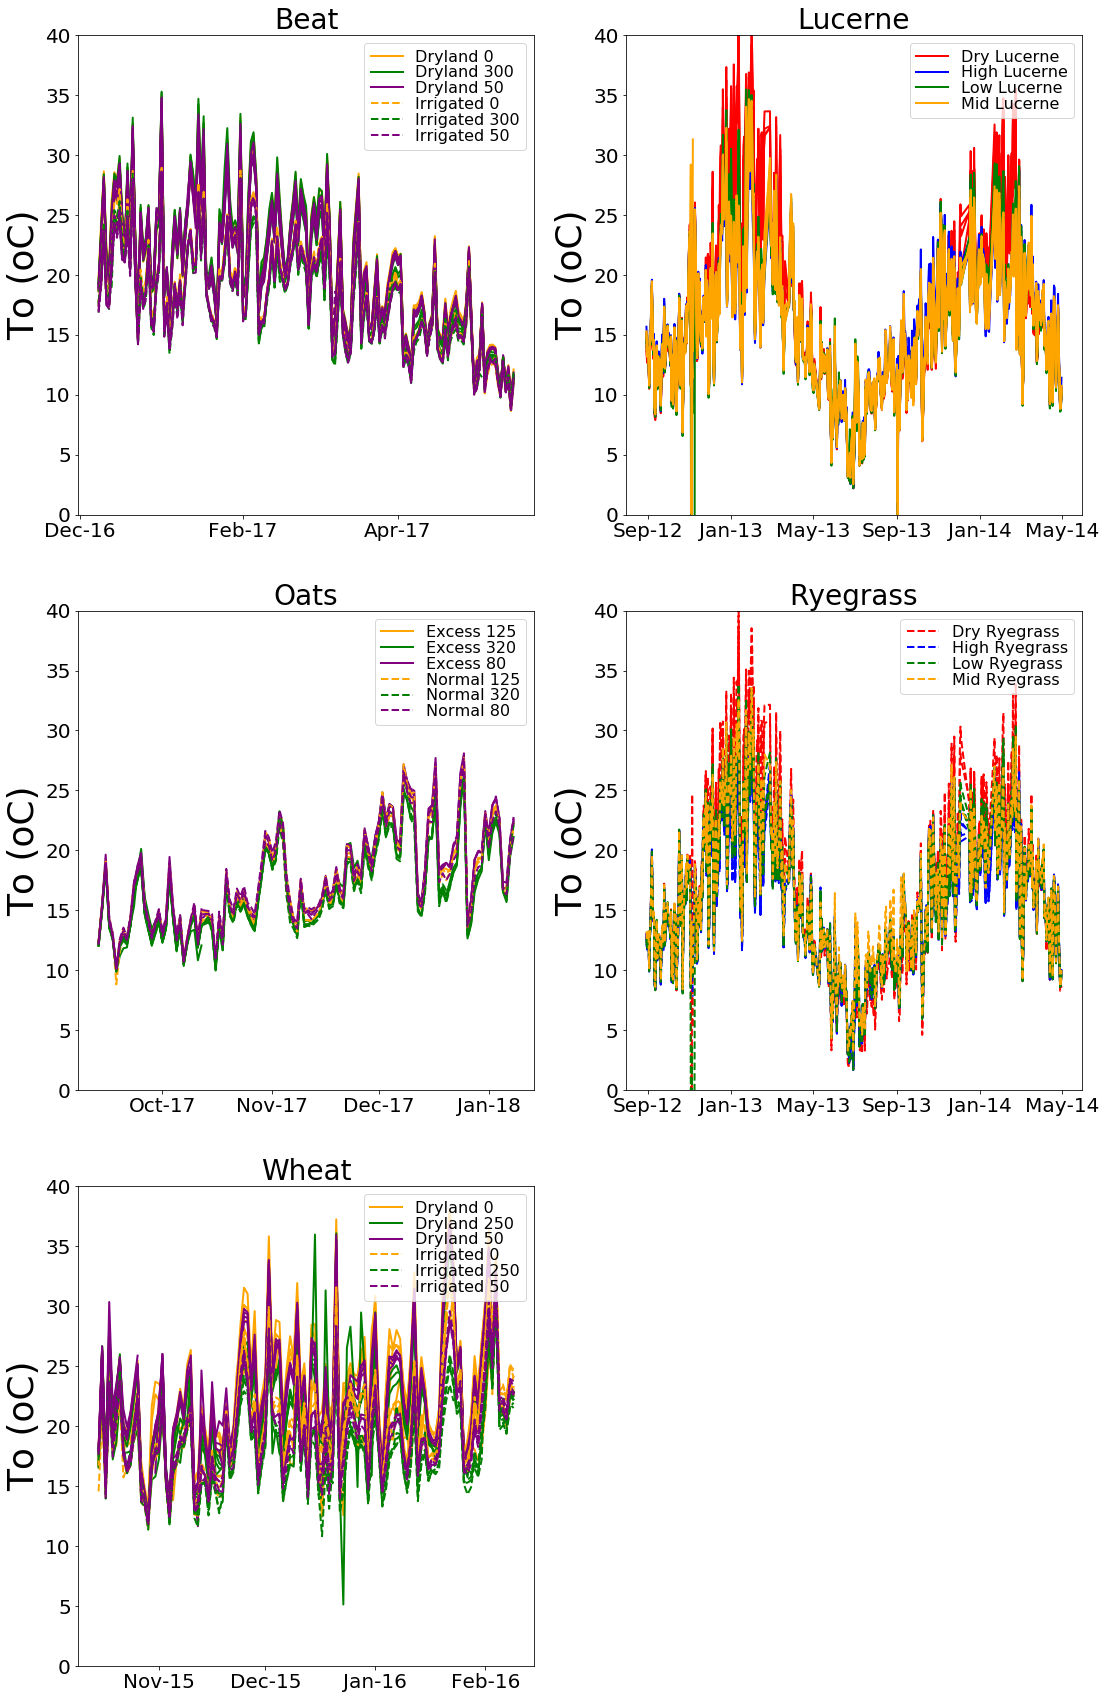

In [37]:
MakeTimeSeriesGraphs(To,'To (oC)',0,40)

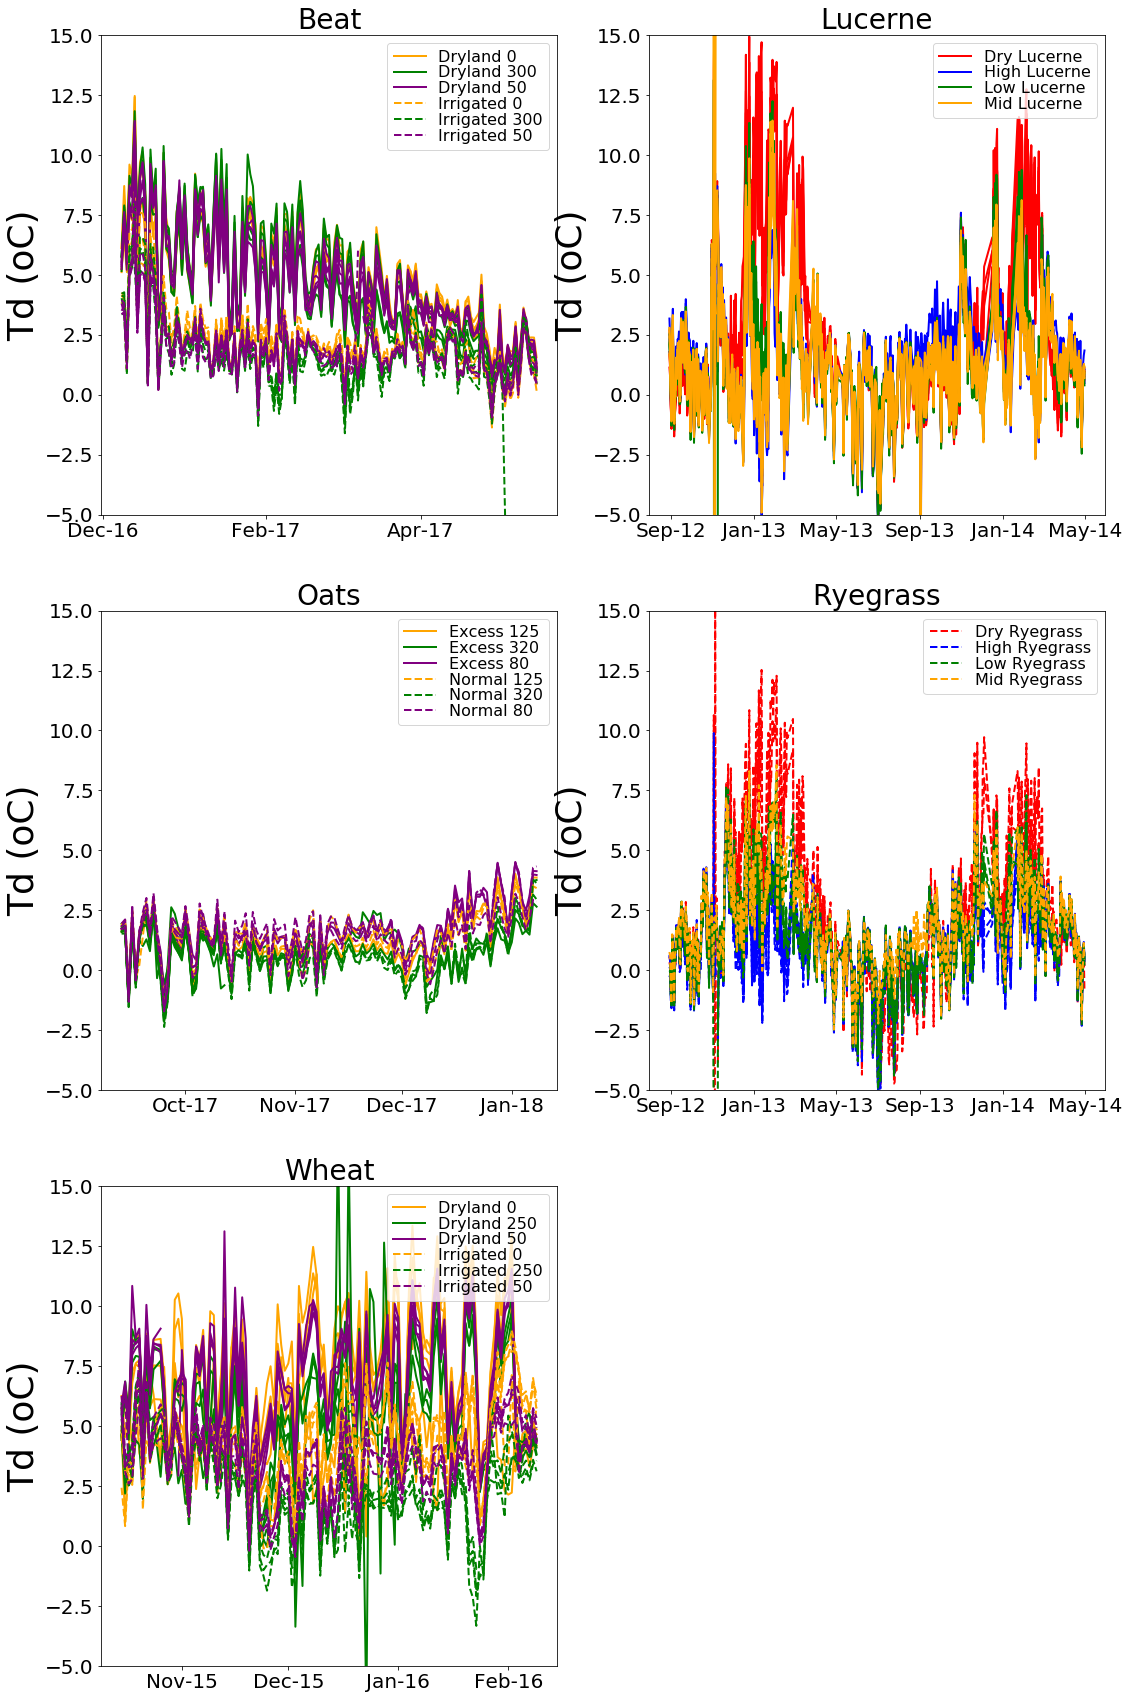

In [38]:
MakeTimeSeriesGraphs(Td,'Td (oC)',-5,15)

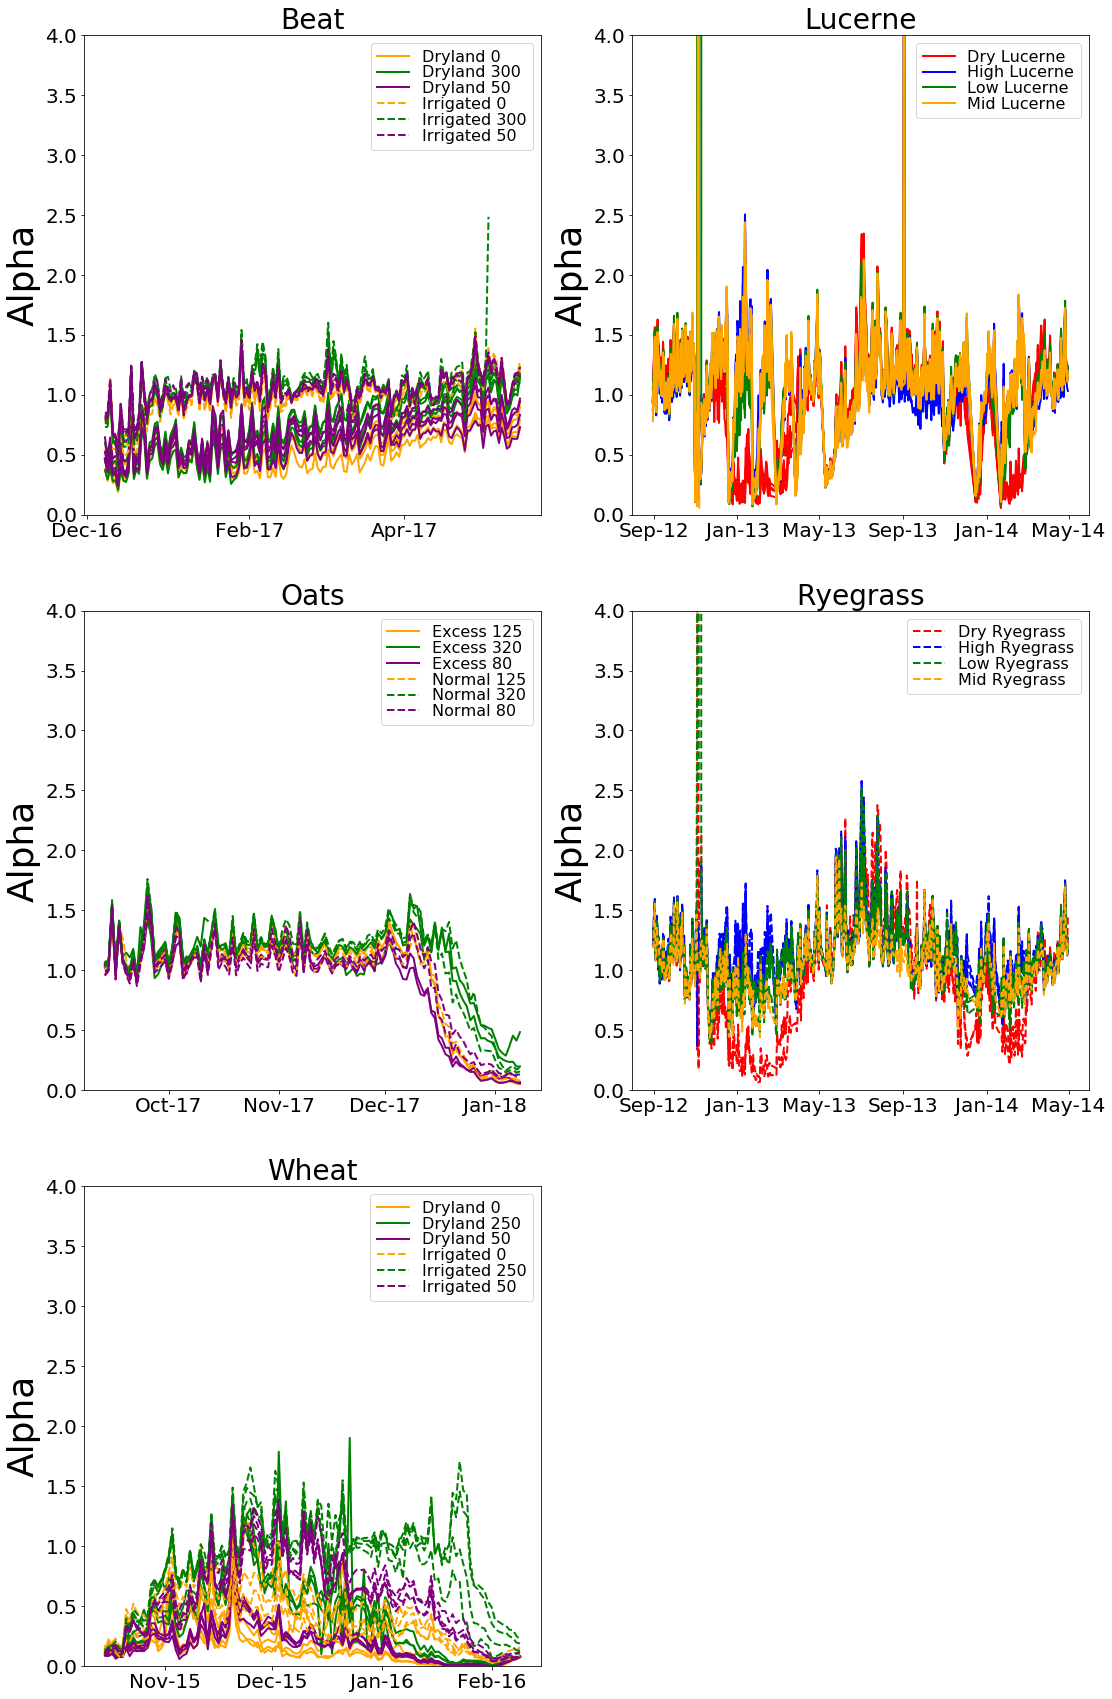

In [39]:
MakeTimeSeriesGraphs(Alpha,'Alpha',0,4)

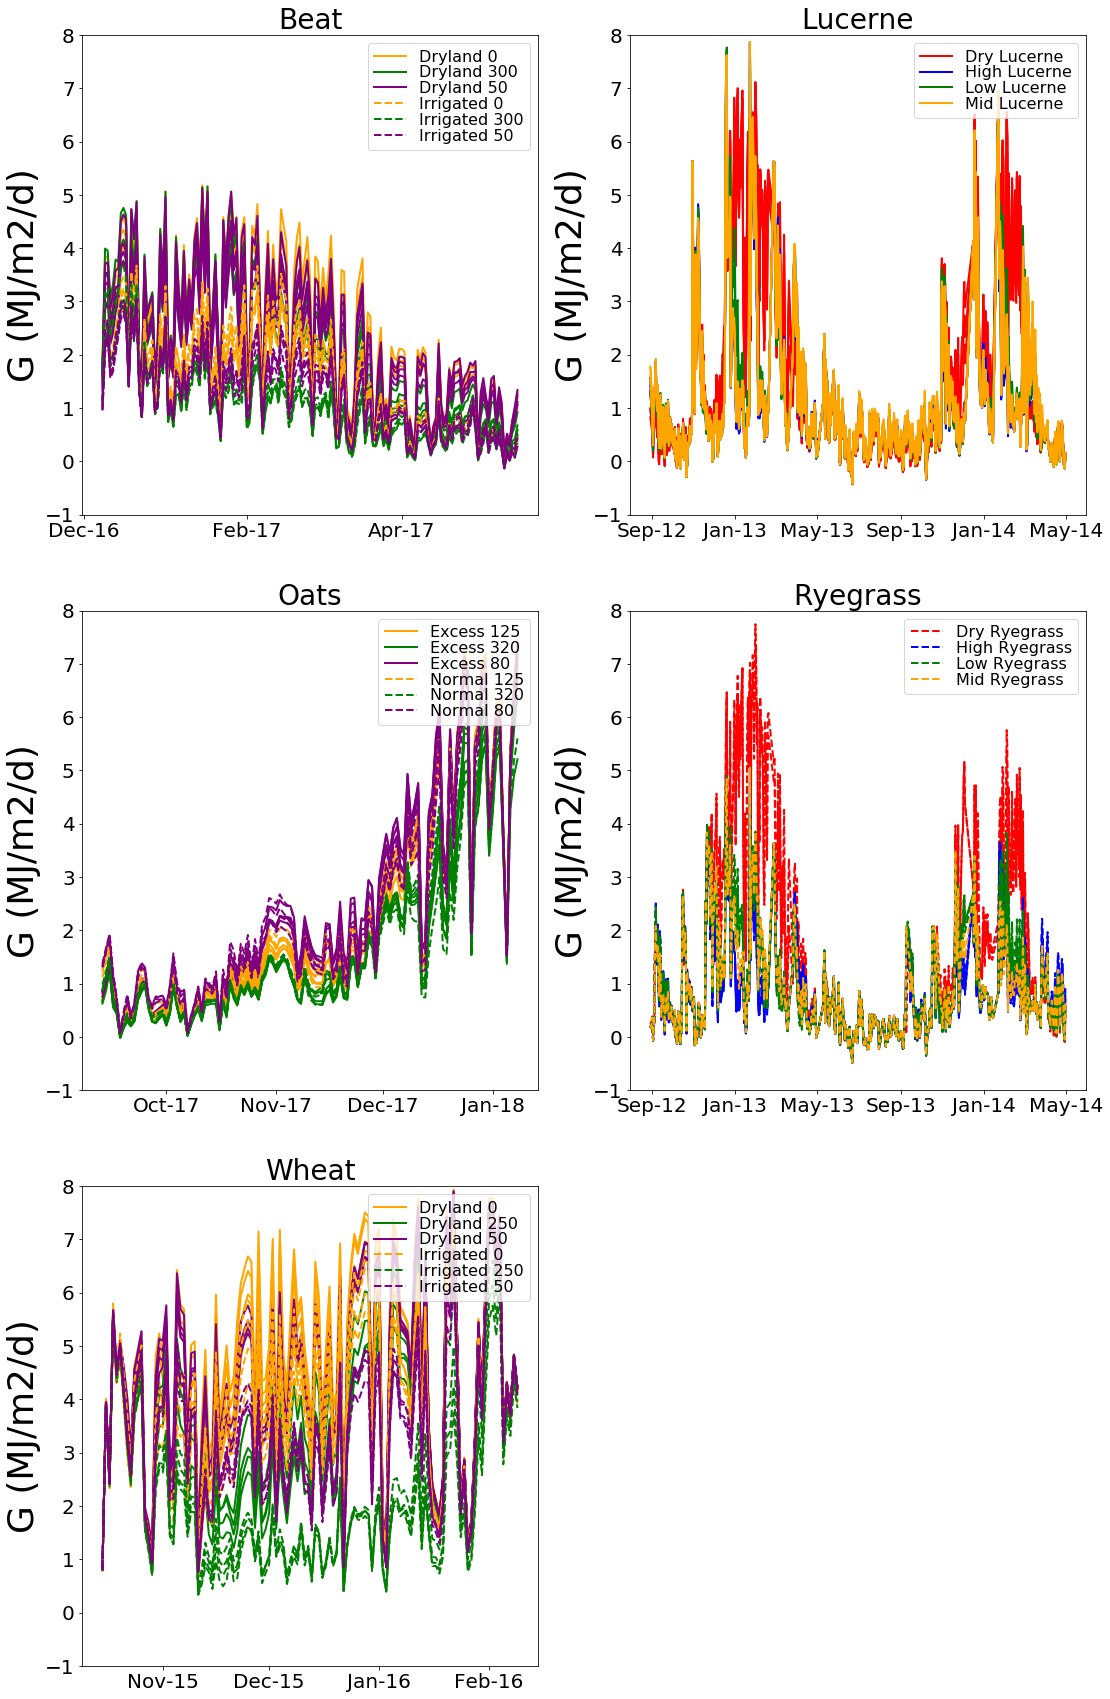

In [40]:
MakeTimeSeriesGraphs(G,'G (MJ/m2/d)',-1,8)

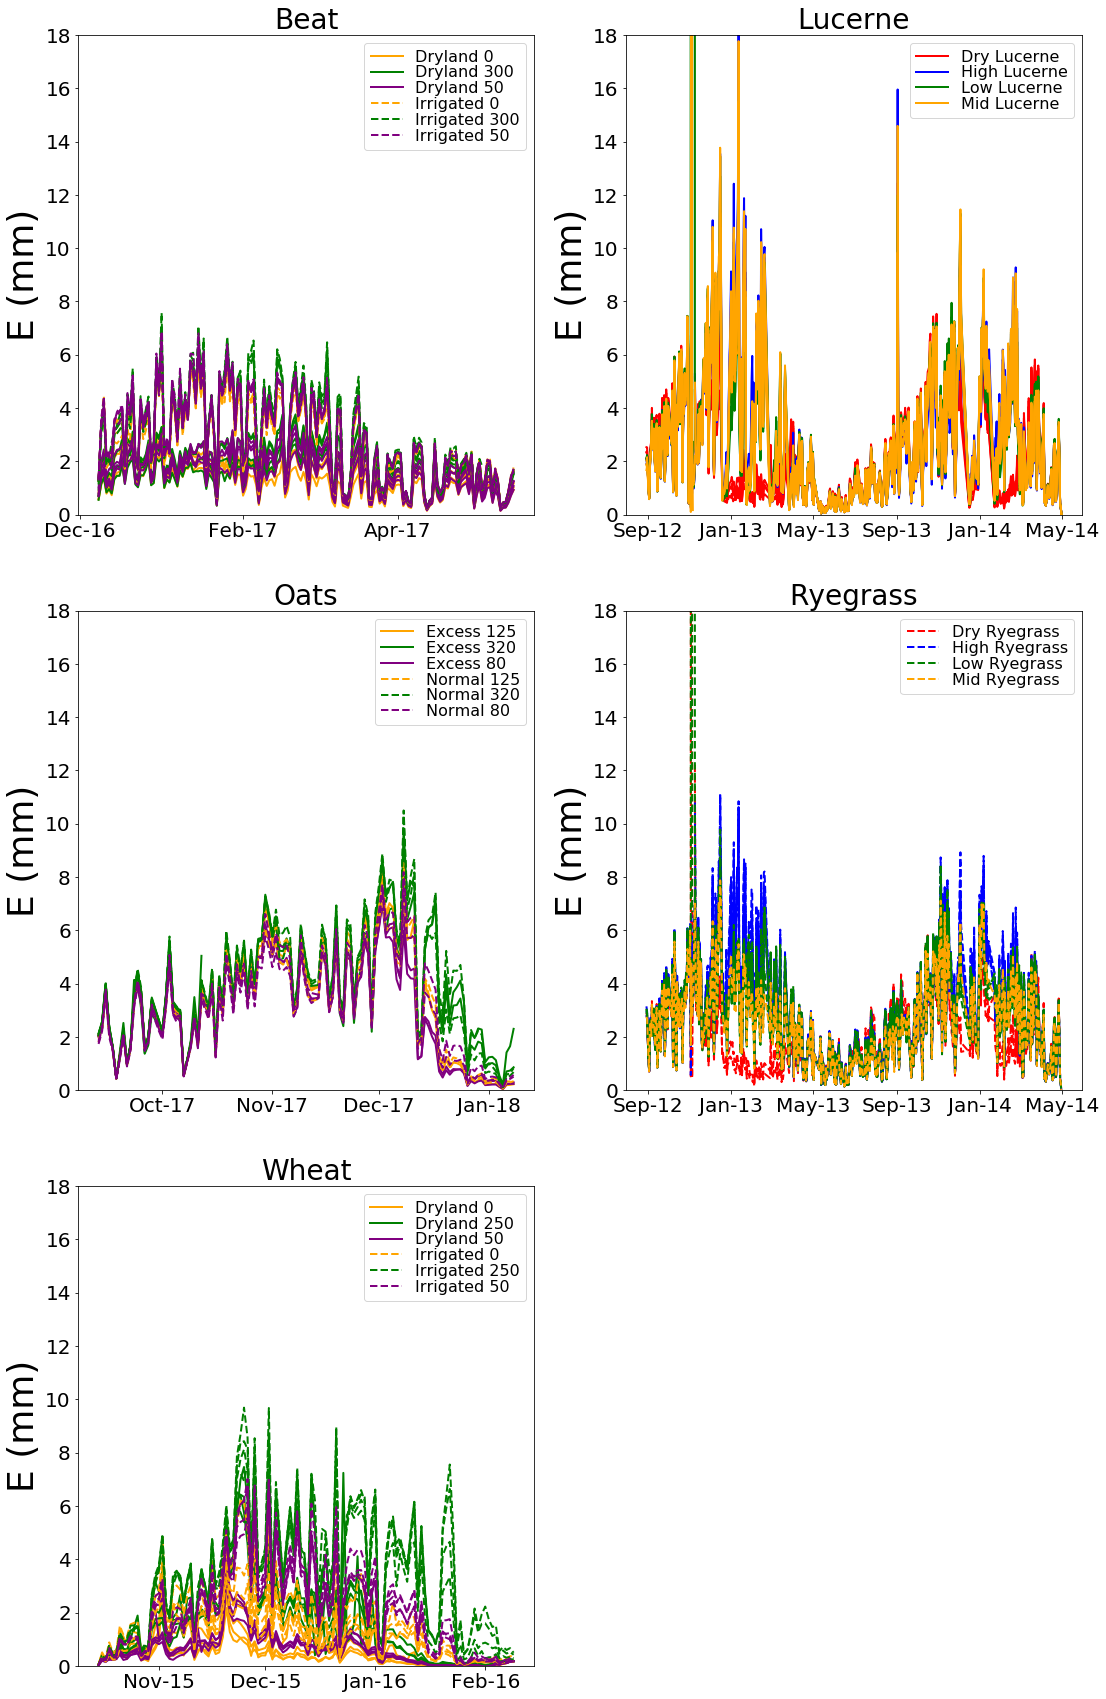

In [41]:
MakeTimeSeriesGraphs(E,'E (mm)',0,18)

## Agregate daily E estimates up to the same period as WU measurements

In [42]:
MeanPeriodE = WU.copy()
MeanPeriodE.loc[:,:] = np.nan
for c in Crops:
    Dates = WU.index
    for d in range(1,len(Dates)):
        for plot in MeanPeriodE.loc[:,c].columns:
            MeanPeriodE.loc[Dates[d],(c,plot)] = E.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(c,plot)].mean()        

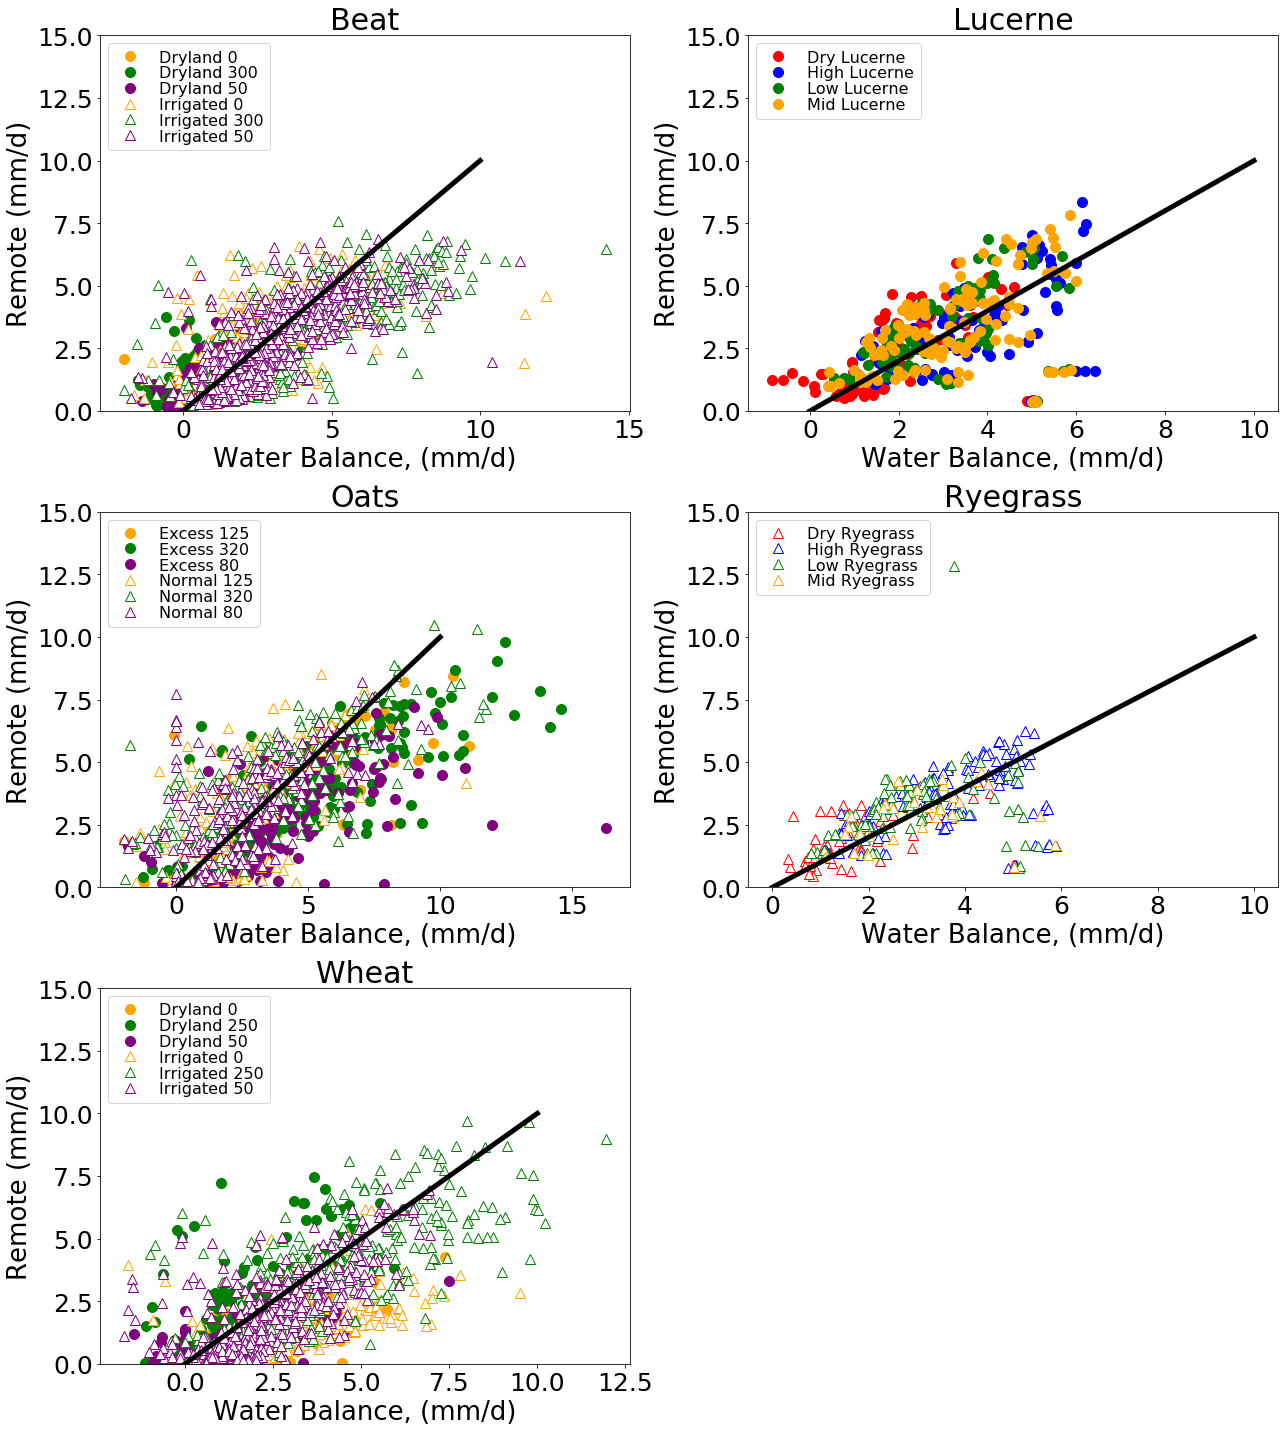

In [43]:
Graph = plt.figure(figsize=(18,20))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedXY(-WU.reindex(MeanPeriodE.index).loc[:,crop],
                        MeanPeriodE.loc[:,crop],
                        ax,globals()[crop+'GPs'], 10)
        plt.plot([0,10],[0,10],'k',lw=5)
        plt.xlabel('Water Balance, (mm/d)',fontsize=26)
        plt.ylabel('Remote (mm/d)',fontsize=26)
        plt.tick_params(labelsize=25)
        plt.title(crop,fontsize=30)
        plt.ylim(-0,15)
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05)
        ledg.get_title().set_fontsize(20)
        pos +=1
plt.tight_layout()    

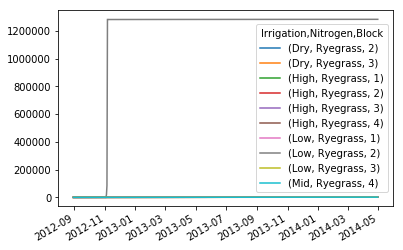

In [57]:
E.loc[:,'Ryegrass'].cumsum().plot()

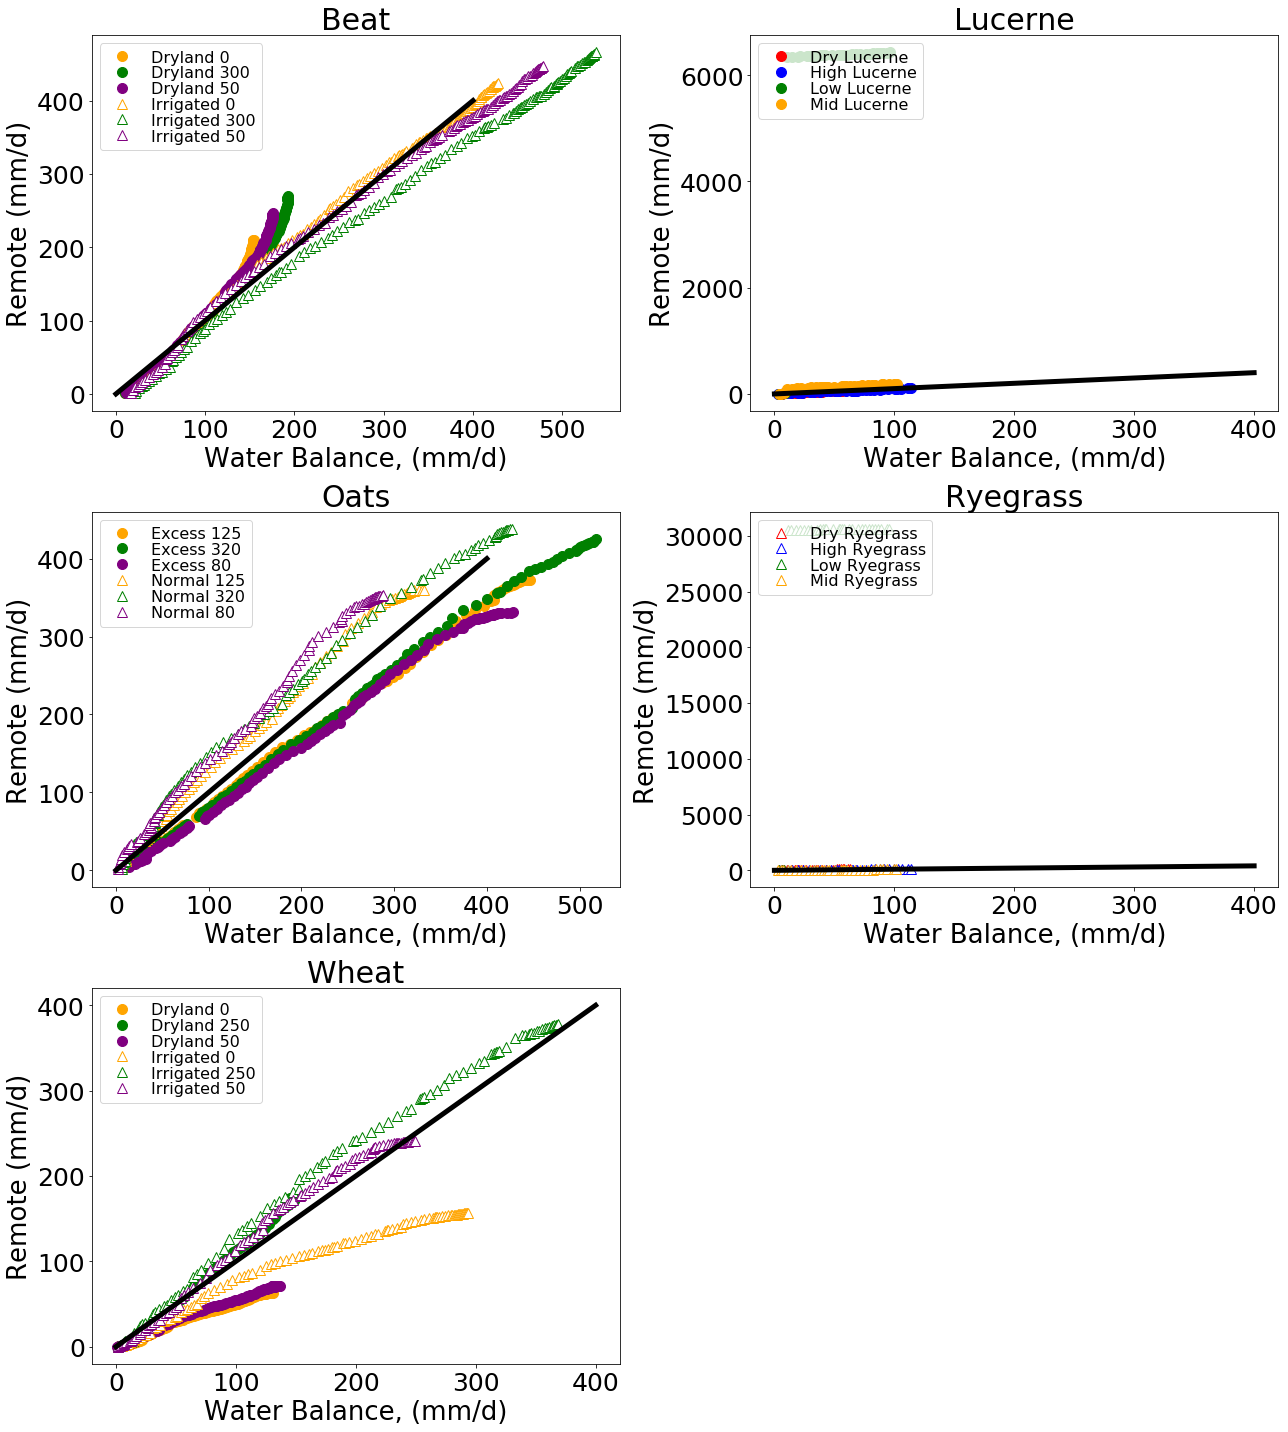

In [52]:
Graph = plt.figure(figsize=(18,20))
pos =  1
for crop in Crops:
        ax = Graph.add_subplot(3,2,pos)
        F1 = WU.loc[:,crop].columns.get_level_values(0).name
        F2 = WU.loc[:,crop].columns.get_level_values(1).name
        GH.AddIndexedXY(-WU.reindex(MeanPeriodE.index).loc[:,crop].groupby(level=[F1,F2],axis=1).mean().cumsum(),
                        C.loc[:,crop].groupby(level=[F1,F2],axis=1).mean().cumsum(),
                        ax,globals()[crop+'GPs'], 10)
        plt.plot([0,400],[0,400],'k',lw=5)
        plt.xlabel('Water Balance, (mm/d)',fontsize=26)
        plt.ylabel('Remote (mm/d)',fontsize=26)
        plt.tick_params(labelsize=25)
        plt.title(crop,fontsize=30)
        #plt.ylim(-0,15)
        labels, handles = GH.DedupLegendElements()
        ledg = plt.legend(labels, handles,loc=2,numpoints=1,fontsize = 16,labelspacing = 0.05)
        ledg.get_title().set_fontsize(20)
        pos +=1
plt.tight_layout()    

## Calculate and graph residules

In [21]:
Residules = np.subtract(MeanPeriodE, -WU)

In [ ]:
MakeTimeSeriesGraphs(Residules,'Residules(mm)',-10,12)

In [ ]:
MakeSingleCropTimeSeries(Residules.loc['2013-01-01':'2013-03-15',:],'Lucerne')

In [ ]:
MakeSingleCropTimeSeries(MeanPeriodE.loc[:'2013-07-01',:],'Ryegrass')

In [ ]:
MakeSingleCropTimeSeries(MeanPeriodE.loc[:'2013-07-01',:],'Lucerne')